In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read the CSV files into pandas dataframes

test =pd.read_csv('test.csv')
train =pd.read_csv('train.csv')
# check the first few rows of the dataframe

print(f'data shape:{train.shape}')
print(train.head())



data shape:(60000, 8)
   id   age     sex     bmi  children smoker     region      charges
0   0  18.0  female  30.875       2.0    yes  northeast  37465.34375
1   1  60.0    male  29.900       0.0     no  northwest  11743.93410
2   2  19.0  female  27.355       0.0    yes  northwest  22412.64850
3   3  61.0    male  22.800       0.0     no  southwest  17878.90068
4   4  55.0  female  43.865       3.0     no  northeast  11015.17470


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        60000 non-null  int64  
 1   age       60000 non-null  float64
 2   sex       60000 non-null  object 
 3   bmi       60000 non-null  float64
 4   children  60000 non-null  float64
 5   smoker    60000 non-null  object 
 6   region    60000 non-null  object 
 7   charges   60000 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.7+ MB


In [4]:
# describe the dataframe to get summary statistics
train.describe()
train.describe(include='object')


,sex,smoker,region
count,60000,60000,60000
unique,2,2,4
top,male,no,northeast
freq,30662,47268,27825


In [5]:
numeric_features = train.select_dtypes(include=[np.number]).columns
categorical_features = train.select_dtypes(include=['object']).columns  
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: Index(['id', 'age', 'bmi', 'children', 'charges'], dtype='object')
Categorical features: Index(['sex', 'smoker', 'region'], dtype='object')


In [7]:
# missing values
missing = train.isnull().sum()
missing = 100 * missing / len(train)
missing_df = pd.DataFrame({
    'column_name': train.columns,
    'percent_missing': missing
})

missing_df = missing_df[missing_df['percent_missing'] > 0].sort_values(by='percent_missing', ascending=False)
print(missing_df)

Empty DataFrame
Columns: [column_name, percent_missing]
Index: []


Text(0.5, 0, 'age')

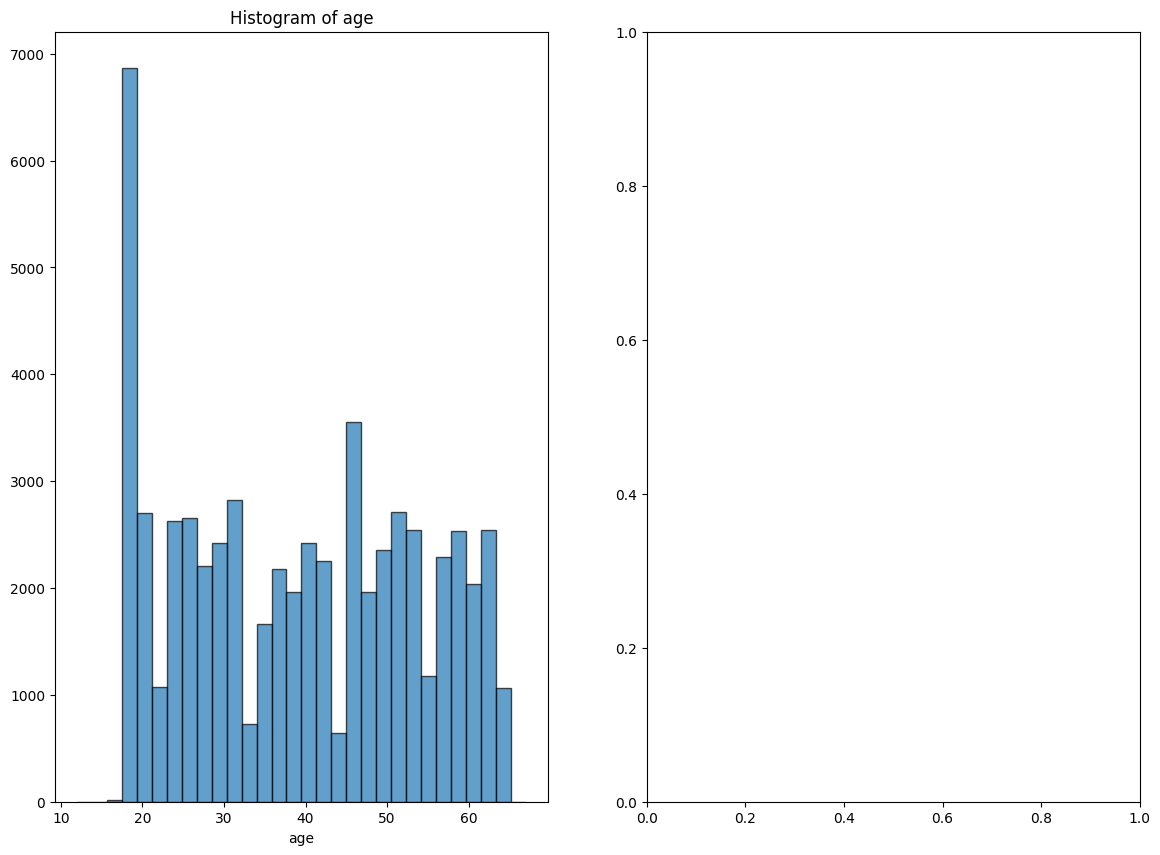

In [8]:
import seaborn as sns
# feature distribution
feature = 'age'

# create plots
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# histogram
axes[0].hist(train[feature], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title(f'Histogram of {feature}')
axes[0].set_xlabel(feature)


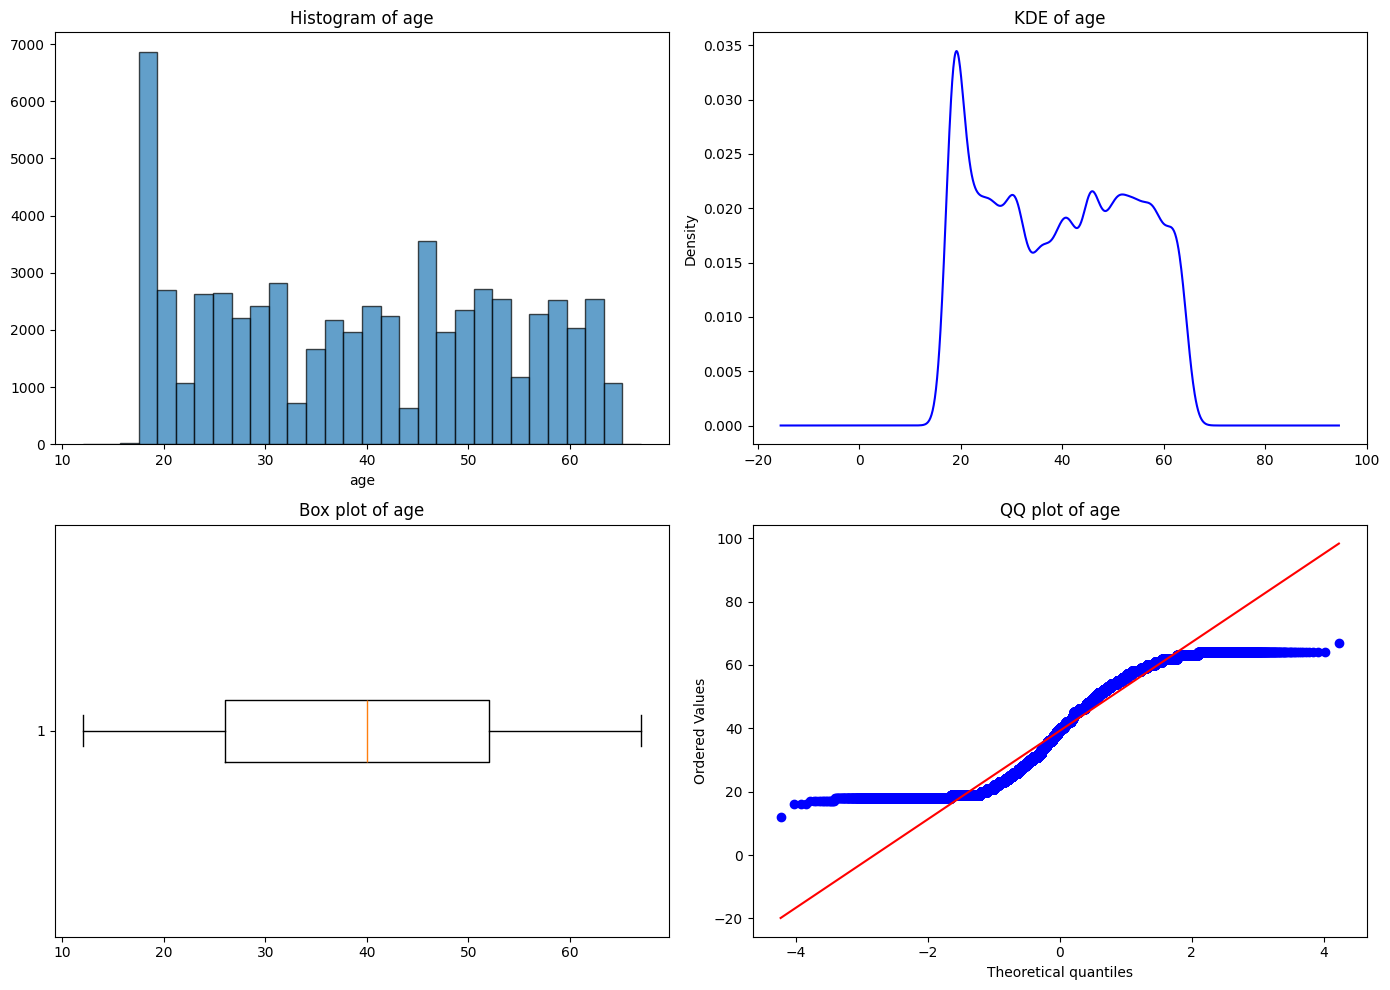

In [12]:
# Create a new 2x2 grid of subplots for all four plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# histogram
axes[0, 0].hist(train[feature], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title(f'Histogram of {feature}')
axes[0, 0].set_xlabel(feature)

# kde plot
train[feature].plot(kind='kde', ax=axes[0, 1], color='blue')
axes[0, 1].set_title(f'KDE of {feature}')

# box plot
axes[1, 0].boxplot(train[feature].dropna(), vert=False)
axes[1, 0].set_title(f'Box plot of {feature}')

# qq plot
import scipy.stats as stats
stats.probplot(train[feature].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title(f'QQ plot of {feature}')

plt.tight_layout()
plt.show()

In [13]:
print(f'mean: {train[feature].mean(): .2f}')
print(f'median: {train[feature].median(): .2f}')
print(f'std: {train[feature].std(): .2f}')
print(f'skewness: {train[feature].skew(): .2f}')
print(f'kurtosis: {train[feature].kurtosis(): .2f}')


mean:  39.22
median:  40.00
std:  14.43
skewness:  0.06
kurtosis: -1.31


In [17]:
# iqr
Q1 = train[feature].quantile(0.25)
Q3 = train[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train[(train[feature] < lower_bound) | (train[feature] > upper_bound)]
print(f'Number of outliers: {len(outliers)} ({len(outliers)/len(train)*100:.2f}%)')

# z-score
z_scores = np.abs((train[feature] - train[feature].mean()) / train[feature].std())
outliers_z = train[z_scores > 3]
print(f'Number of outliers (z-score method): {len(outliers_z)} ({len(outliers_z)/len(train)*100:.2f}%)')

Number of outliers: 0 (0.00%)
Number of outliers (z-score method): 0 (0.00%)


smoker
no     47268
yes    12732
Name: count, dtype: int64
smoker
no     78.78
yes    21.22
Name: proportion, dtype: float64


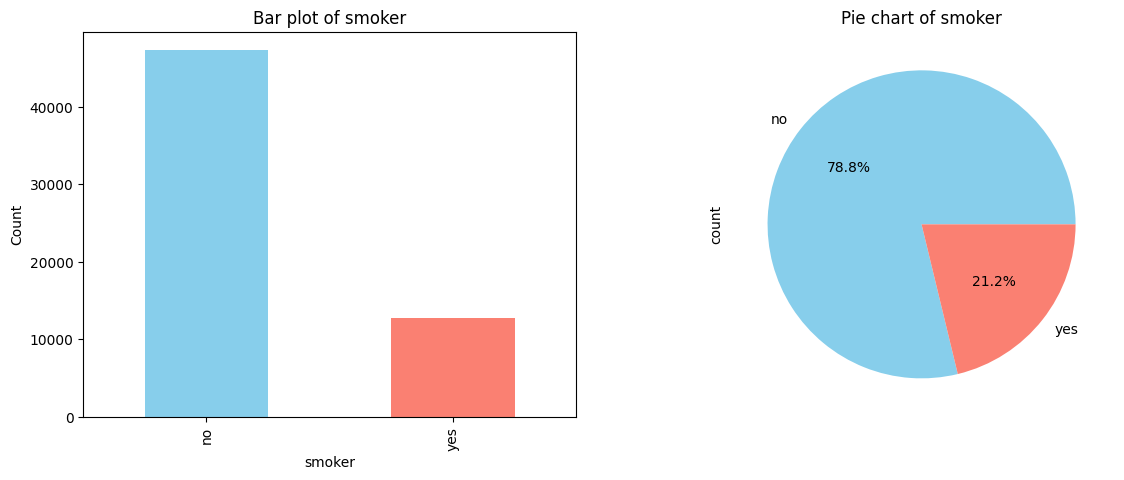

In [19]:
feature = 'smoker'
value_counts = train[feature].value_counts()
print(value_counts)

value_pct = train[feature].value_counts(normalize=True) * 100
print(value_pct)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# bar plot
value_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title(f'Bar plot of {feature}')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Count') 

# pie chart
value_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title(f'Pie chart of {feature}')

plt.show()

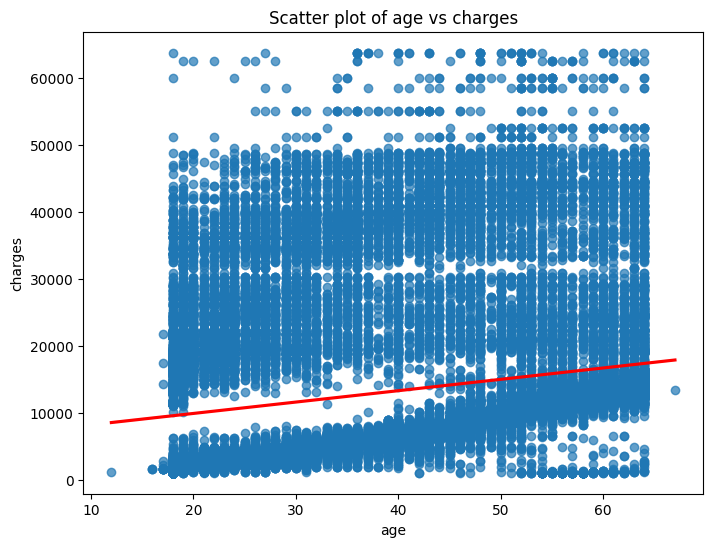

Correlation between age and charges: 0.203


In [23]:
target = 'charges'
feature = 'age'

# scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=train[feature], y=train[target], scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title(f'Scatter plot of {feature} vs {target}')
plt.show()

# correlation
correlation = train[feature].corr(train[target])
print(f'Correlation between {feature} and {target}: {correlation:.3f}')


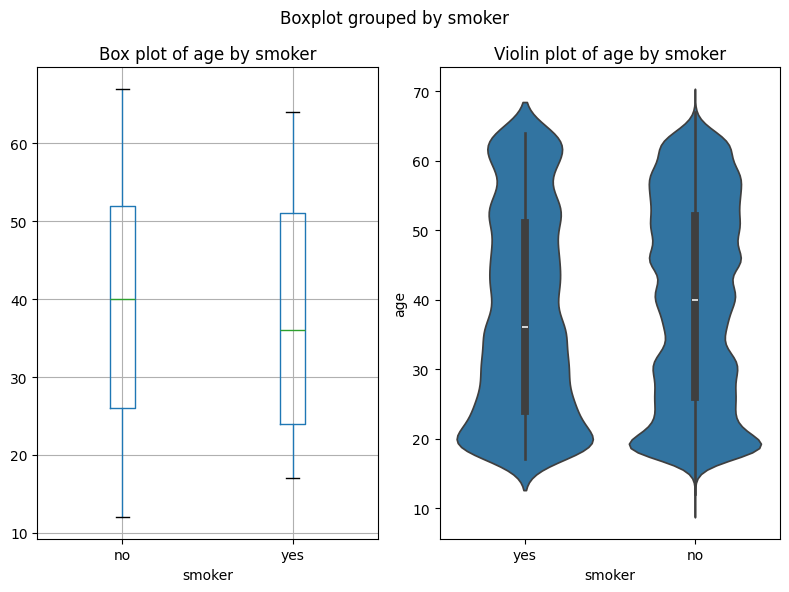

In [25]:
target = 'smoker'  # or 'sex'
feature = 'age'

plt.figure(figsize=(8, 6))

# box plot
plt.subplot(1, 2, 1)
train.boxplot(column=feature, by=target, ax=plt.gca())
plt.title(f'Box plot of {feature} by {target}')

# violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x=train[target], y=train[feature], ax=plt.gca())
plt.title(f'Violin plot of {feature} by {target}')
plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import ttest_ind
group1 = train[train[target] == 'yes'][feature].dropna()
group2 = train[train[target] == 'no'][feature].dropna()
t_stat, p_value = ttest_ind(group1, group2)
print(f'T-test between groups of {target} for {feature}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}')


T-test between groups of smoker for age: t-statistic = -12.353, p-value = 0.000


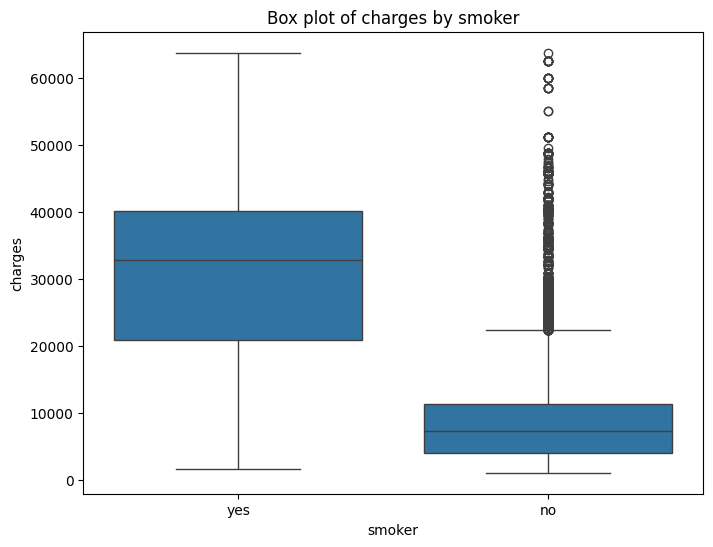

          count          mean           std        min         25%  \
smoker                                                               
no      47268.0   8404.431900   6095.668374  1121.8739   3989.8410   
yes     12732.0  31117.995675  11806.573922  1694.7964  20984.0936   

                50%        75%          max  
smoker                                       
no       7371.77200  11362.755  63770.42801  
yes     32787.45859  40103.890  63770.42801  
ANOVA results for charges by smoker: F-statistic = 87928.283, p-value = 0.000


In [28]:
feature = 'smoker'
target = 'charges'
# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=train[feature], y=train[target])
plt.title(f'Box plot of {target} by {feature}')
plt.show()

# descriptive statistics
print(train.groupby(feature)[target].describe())

# ANOVA
import scipy.stats as stats
groups = [group[target].dropna() for name, group in train.groupby(feature)]
f_stat, p_value = stats.f_oneway(*groups)
print(f'ANOVA results for {target} by {feature}: F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}')

age         12.0      16.0      17.0      18.0      19.0      20.0      21.0  \
smoker                                                                         
no      0.000021  0.000063  0.000254  0.051896  0.060866  0.016988  0.024964   
yes     0.000000  0.000000  0.000236  0.042648  0.077757  0.030789  0.025448   

age         22.0      23.0      24.0  ...      56.0      57.0     58.0  \
smoker                                ...                                
no      0.017898  0.021071  0.017475  ...  0.022087  0.020035  0.03294   
yes     0.018143  0.032831  0.030631  ...  0.013588  0.009582  0.00864   

age         59.0      60.0      61.0      62.0      63.0      64.0      67.0  
smoker                                                                        
no      0.014682  0.017242  0.013942  0.024477  0.018173  0.014111  0.000021  
yes     0.013195  0.025291  0.018693  0.015708  0.025683  0.031103  0.000000  

[2 rows x 51 columns]


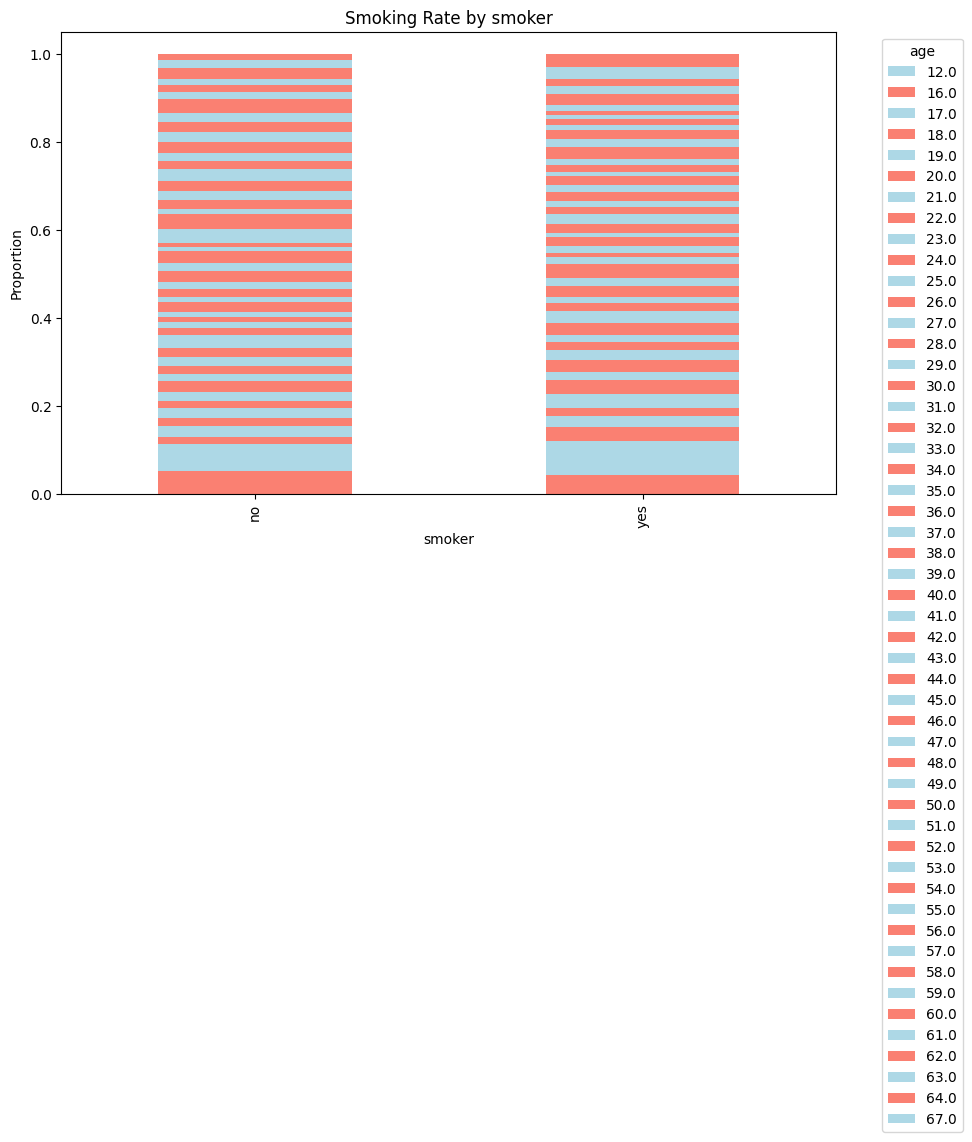

In [33]:
feature = 'smoker'
target = 'age'  # Use an existing categorical column

# cross-tabulation
ct = pd.crosstab(train[feature], train[target], normalize='index')
print(ct)

# bar plot
ct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title(f'Smoking Rate by {feature}')
plt.xlabel(feature)
plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Proportion')

plt.show()

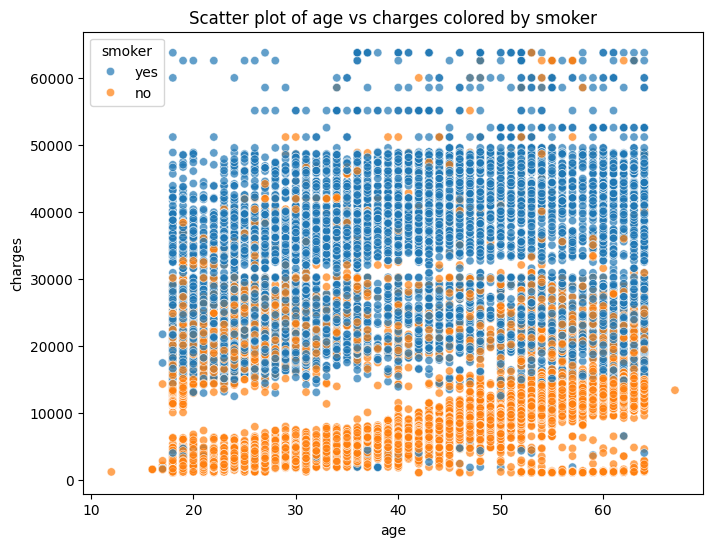

In [34]:
feature1 = 'age'
feature2 = 'smoker'
target = 'charges'

# scatter plot with hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train[feature1], y=train[target], hue=train[feature2], alpha=0.7)
plt.title(f'Scatter plot of {feature1} vs {target} colored by {feature2}')
plt.show()

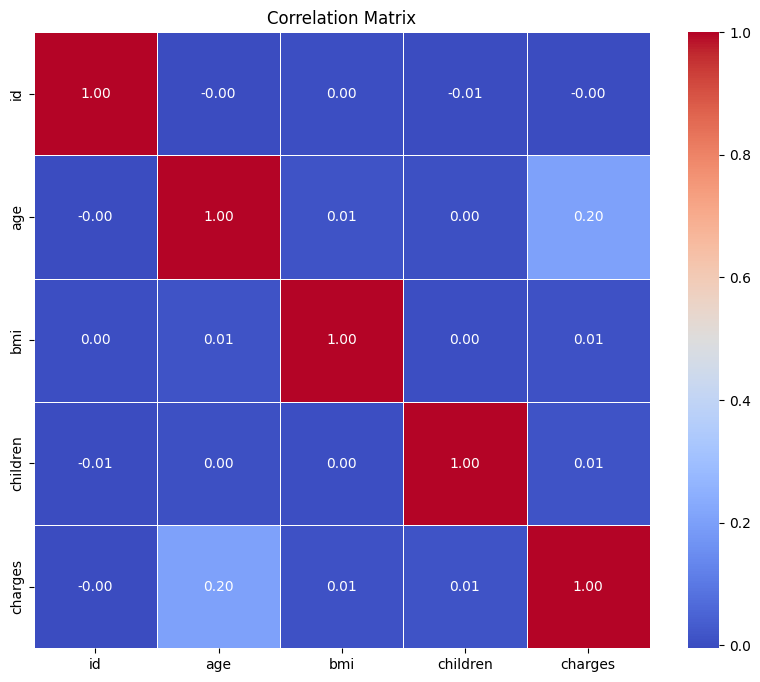

In [35]:
numeric_cols = train.select_dtypes(include=[np.number]).columns
correlation_matrix = train[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
             annot=True, 
             fmt='.2f', 
             cmap='coolwarm', 
             square=True,
             linecolor='white',
             linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()


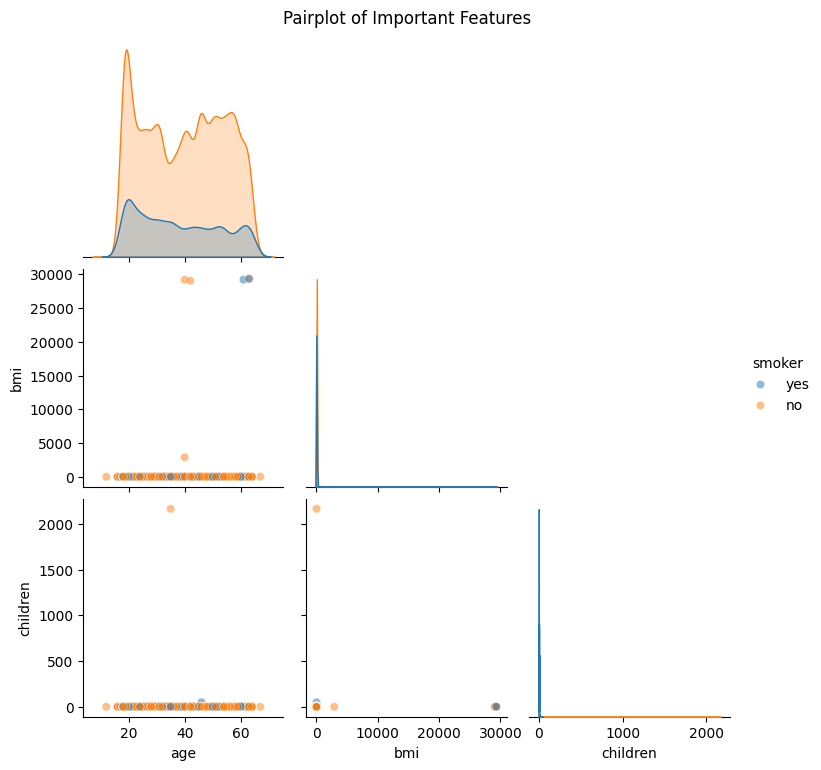

In [37]:
important_features = ['age', 'bmi', 'children', 'smoker', 'region']
sns.pairplot(train[important_features], 
             hue='smoker', 
             diag_kind='kde', 
             plot_kws={'alpha':0.5},
             corner=True)

plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()

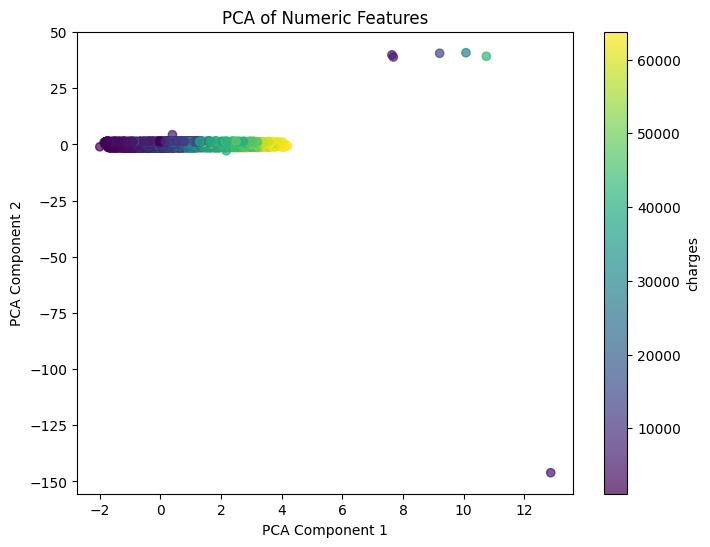

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the numeric features
x = train[numeric_cols].dropna()

# standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA transformation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

# visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_result[:, 0], 
    pca_result[:, 1], 
    alpha=0.7,
    cmap='viridis',
    c=train.loc[x.index, target]  # color by charges
)

plt.colorbar(label=target)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Numeric Features')
plt.show()